In [7]:
import pandas as pd 
import catboost as cb 
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# # Busqueda de la cantidad de iteraciones



train_values = pd.read_csv('train_values_catboost.csv', index_col='building_id')
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

In [3]:
categoricas = []
for col in train_values.columns:
    if ((col != 'min_geo_id') & (col != 'max_geo_id')):
        categoricas.append(col)
        categoricas.append(train_values.columns.get_loc(col))
        train_values[col] = train_values[col].astype("category")

In [4]:

pool = cb.Pool(data=train_values,
                label=train_labels,
                cat_features=categoricas)

In [5]:
# Para correr en gpu habria que agregar a params
#  "task_type":"GPU"
params = {"loss_function":'MultiClass', "eval_metric":'TotalF1:average=Micro', "iterations":4000,
        "random_seed":2021}
resultados = cb.cv(pool, params, fold_count=12)


0:	learn: 0.7231906	test: 0.7237308	best: 0.7237308 (0)	total: 28s	remaining: 1d 7h 5m 24s
1:	learn: 0.7248612	test: 0.7250548	best: 0.7250548 (1)	total: 52.7s	remaining: 1d 5h 15m 21s
2:	learn: 0.7275539	test: 0.7276948	best: 0.7276948 (2)	total: 1m 16s	remaining: 1d 4h 15m 46s
3:	learn: 0.7315325	test: 0.7314515	best: 0.7314515 (3)	total: 1m 39s	remaining: 1d 3h 38m 55s
4:	learn: 0.7309481	test: 0.7310371	best: 0.7314515 (3)	total: 2m 3s	remaining: 1d 3h 23m 43s
5:	learn: 0.7317125	test: 0.7314976	best: 0.7314976 (5)	total: 2m 27s	remaining: 1d 3h 11m 57s
6:	learn: 0.7324750	test: 0.7319849	best: 0.7319849 (6)	total: 2m 52s	remaining: 1d 3h 18m 53s
7:	learn: 0.7329962	test: 0.7324262	best: 0.7324262 (7)	total: 3m 16s	remaining: 1d 3h 13m 27s
8:	learn: 0.7333545	test: 0.7329174	best: 0.7329174 (8)	total: 3m 40s	remaining: 1d 3h 7m 59s
9:	learn: 0.7337567	test: 0.7333318	best: 0.7333318 (9)	total: 4m 4s	remaining: 1d 3h 3m 35s
10:	learn: 0.7341460	test: 0.7336388	best: 0.7336388 (10)	t

In [ ]:
print("Cantidad de iteraciones que mejor funciono:  ", end='')
print(resultados["test-TotalF1:average=Micro-mean"].idxmax())


plt.plot(resultados['iterations'],resultados["test-TotalF1:average=Micro-mean"])
plt.xlabel("Cantidad de iteraciones",  fontsize=10)
plt.ylabel("F1 Score promedio en el set de test",  fontsize=10)
plt.title('F1 Score promedio en el set de test segun\n la cantidad de iteraciones\n'
         "en Catboost con CrossValidation y 10 folds",  fontsize=15)
plt.figure(figsize=(10,10))
plt.show()
plt.savefig("Cantidad de iteraciones.jpg")

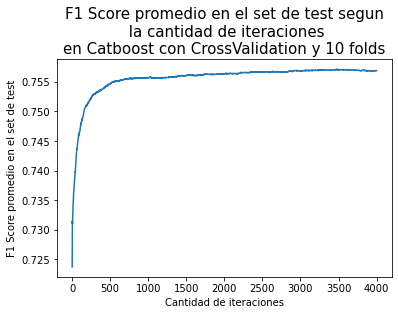

In [3]:
from IPython.display import Image
Image(filename='Catboost Pool graph.png')